In [145]:
import json
import numpy as np
import pandas as pd

In [146]:
path = "2023_06_25_19:46:09/result_9.json"

with open('../EvolutionaryFramework/results/MOEA_D/' + path) as user_file:
  parsed_json = json.load(user_file)
  
# print(json.dumps(parsed_json, indent = 4, sort_keys=True))

In [147]:
data = []
metaParameters = []
for elem in parsed_json:
    if elem == "metaParameters":
        metaDictionary = {
            'algorithmName': parsed_json[elem]["algorithmName"],
            'populationSize': parsed_json[elem]["populationSize"],
            'numberOfBars': parsed_json[elem]["numberOfBars"],
            'maxNumberOfNotes': parsed_json[elem]["maxNumberOfNotes"],
            'representationType': parsed_json[elem]["representationType"],
            'melodyKeyValue': parsed_json[elem]["melodyKeyValue"],
            'melodyKeyType': parsed_json[elem]["melodyKeyType"],
            'crossoverProbability': parsed_json[elem]["crossoverProbability"],
            'mutationProbability': parsed_json[elem]["mutationProbability"],
            'selectionType': parsed_json[elem]["selectionType"],
            'matingPoolSelectionType': parsed_json[elem]["matingPoolSelectionType"],
            'numberOfGenerations': parsed_json[elem]["numberOfGenerations"],
            'criteria': parsed_json[elem]["criteria"],
        }
        for key, value in parsed_json[elem]["weightsValues"].items():
            metaDictionary["weightsValues_" + key] = value
        for key, value in parsed_json[elem]["crossoverType"].items():
            metaDictionary["crossoverType_" + key] = value
        for key, value in parsed_json[elem]["mutationType"].items():
            metaDictionary["mutationType_" + key] = value
metaParameters.append(metaDictionary)

metaParameters_df = pd.DataFrame(metaParameters)   


for elem in parsed_json:
        if elem == "experiment":
            for generation in parsed_json[elem]:
                for individual in parsed_json[elem][generation]:
                    dictionary = {}
                    dictionary = {
                        'generation': generation,
                        'melody': individual['melody'],
                        'penalty': individual['penalty']
                    }
                    for criterion in metaParameters_df['criteria'].values[0]:
                        dictionary[criterion] = individual['fitness'][criterion]
                    data.append(dictionary)
data_df = pd.DataFrame(data)

In [148]:
data_df.head()

,generation,melody,penalty,SIMPLE_AND_OBVIOUS,COMPLICATED_AND_ENIGMATIC
0,generation_99,68/0.5 75/0.1875 70/0.125 67/0.0625 70/0.125 7...,0.475713,0.659277,0.663666
1,generation_99,68/0.6875 70/0.125 70/0.0625 70/0.125 67/0.437...,0.471335,0.675169,0.650336
2,generation_99,68/0.5 75/0.1875 70/0.125 67/0.0625 70/0.125 6...,0.470031,0.648010,0.669608
3,generation_99,65/0.8125 70/0.0625 70/0.125 70/0.25 58/0.0625...,0.494652,0.771377,0.614289
4,generation_99,53/0.8125 70/0.0625 70/0.125 70/0.25 58/0.0625...,0.497608,0.773209,0.613660


In [149]:
metaParameters_df.head()

,algorithmName,populationSize,numberOfBars,maxNumberOfNotes,representationType,melodyKeyValue,melodyKeyType,crossoverProbability,mutationProbability,selectionType,...,weightsValues_NON_PERFECT_INTERVAL,crossoverType_TWO_POINT_CROSSOVER,crossoverType_ONE_POINT_CROSSOVER,crossoverType_MUSICAL_CONTEXT,mutationType_ADD_ZERO,mutationType_SWAP_NOTES,mutationType_SIMPLE,mutationType_TRANSPOSE_NOTES,mutationType_MUSICAL_CONTEXT,mutationType_ADD_REST
0,MOEA/D,250,4,16,f1,D#,MAJOR,0.8,0.25,,...,2.0,1.0,2.0,4.0,0.5,1.0,1.0,1.0,5.0,0.5


In [150]:
data_df.head()

,generation,melody,penalty,SIMPLE_AND_OBVIOUS,COMPLICATED_AND_ENIGMATIC
0,generation_99,68/0.5 75/0.1875 70/0.125 67/0.0625 70/0.125 7...,0.475713,0.659277,0.663666
1,generation_99,68/0.6875 70/0.125 70/0.0625 70/0.125 67/0.437...,0.471335,0.675169,0.650336
2,generation_99,68/0.5 75/0.1875 70/0.125 67/0.0625 70/0.125 6...,0.470031,0.648010,0.669608
3,generation_99,65/0.8125 70/0.0625 70/0.125 70/0.25 58/0.0625...,0.494652,0.771377,0.614289
4,generation_99,53/0.8125 70/0.0625 70/0.125 70/0.25 58/0.0625...,0.497608,0.773209,0.613660


In [151]:
data_df.loc[0]

generation                                                       generation_99
melody                       68/0.5 75/0.1875 70/0.125 67/0.0625 70/0.125 7...
penalty                                                               0.475713
SIMPLE_AND_OBVIOUS                                                    0.659277
COMPLICATED_AND_ENIGMATIC                                             0.663666
Name: 0, dtype: object

In [152]:
# ( fitness - min ) / ( max - min )

weightsMin = 0.0
weightsMax = 0.5

penaltyMin = 0.0
penaltyMax = 0.5

In [153]:
criteria = metaParameters_df['criteria'].values[0]
for criterion in criteria:
    data_df[criterion] = ( data_df[criterion] - data_df['penalty'] - weightsMin ) / (weightsMax - weightsMin)
data_df['penalty'] = ( data_df['penalty'] - penaltyMin ) / (penaltyMax - penaltyMin)

In [154]:
data_df.loc[0]

generation                                                       generation_99
melody                       68/0.5 75/0.1875 70/0.125 67/0.0625 70/0.125 7...
penalty                                                               0.951426
SIMPLE_AND_OBVIOUS                                                    0.367128
COMPLICATED_AND_ENIGMATIC                                             0.375906
Name: 0, dtype: object

In [155]:
generation = data_df[data_df["generation"] == "generation_100"]

In [156]:
list_of_fronts = []
for criterion in metaParameters_df['criteria'].values[0]:
    criterion_individuals = []
    for individual in generation[criterion]:
        criterion_individuals.append(individual)
    list_of_fronts.append(criterion_individuals)


In [157]:
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

47


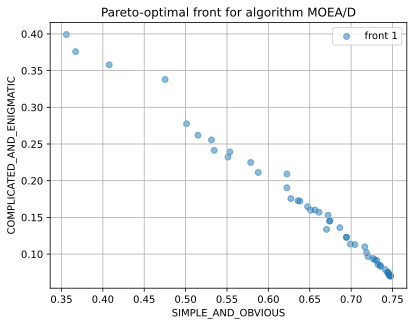

In [158]:
fig, ax = plt.subplots()
ax.set_title("Pareto-optimal front for algorithm MOEA/D")
for i, criterion in enumerate(metaParameters_df['criteria'].values[0]):
    if i == 0:
        ax.set_xlabel(criterion)
    else:
        ax.set_ylabel(criterion)
ax.grid()


ax.scatter(list_of_fronts[0], list_of_fronts[1], label = f"front 1", alpha=0.5)
print(len(list_of_fronts[0]))

plt.legend()
plt.show()


In [159]:
from natsort import index_natsorted
list_of_generations = []
data_df = data_df.sort_values(by=['generation'], key = lambda x: np.argsort(index_natsorted(data_df["generation"])))
for generation_name in data_df["generation"].unique():
    list_of_fronts = []
    generation = data_df[data_df["generation"] == generation_name]
    print(generation_name)
    for criterion in metaParameters_df['criteria'].values[0]:
        criterion_individuals = []
        for individual in generation[criterion]:
            criterion_individuals.append(individual)
        list_of_fronts.append(criterion_individuals)
    list_of_generations.append(list_of_fronts)

average_generations = np.zeros((len(list_of_generations), len(metaParameters_df['criteria'].values[0])))

for idx, elem in enumerate(list_of_generations):
    temp = np.zeros(len(metaParameters_df['criteria'].values[0]))
    for i, criterion in enumerate(elem):
        temp[i] = np.average(criterion) 
    average_generations[idx] = temp 

print(average_generations)



generation_1
generation_2
generation_3
generation_4
generation_5
generation_6
generation_7
generation_8
generation_9
generation_10
generation_11
generation_12
generation_13
generation_14
generation_15
generation_16
generation_17
generation_18
generation_19
generation_20
generation_21
generation_22
generation_23
generation_24
generation_25
generation_26
generation_27
generation_28
generation_29
generation_30
generation_31
generation_32
generation_33
generation_34
generation_35
generation_36
generation_37
generation_38
generation_39
generation_40
generation_41
generation_42
generation_43
generation_44
generation_45
generation_46
generation_47
generation_48
generation_49
generation_50
generation_51
generation_52
generation_53
generation_54
generation_55
generation_56
generation_57
generation_58
generation_59
generation_60
generation_61
generation_62
generation_63
generation_64
generation_65
generation_66
generation_67
generation_68
generation_69
generation_70
generation_71
generation_72
g

/var/folders/xt/9n_zwlsd12d73nqvy46sv7dm0000gn/T/ipykernel_7582/772001616.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(X, rotation=90)


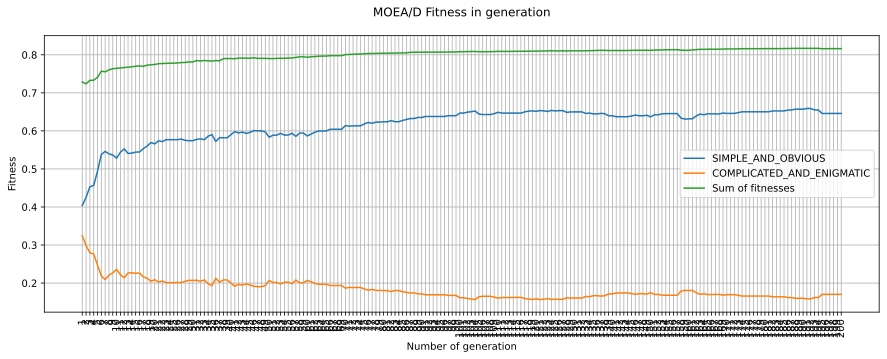

In [160]:
X = data_df["generation"].unique()
for i, elem in enumerate(X):
    X[i] = elem[11:]


fig, ax = plt.subplots(figsize=(15,5))
# ax.set_title("MOEA/D Fitness in generation\n" + path)
ax.set_title("MOEA/D Fitness in generation\n")
for i, criterion in enumerate(metaParameters_df['criteria'].values[0]):  
    ax.plot(X, average_generations[:,i], label=criterion)
        
ax.plot(X, average_generations[:,0] + average_generations[:,1], label="Sum of fitnesses")

ax.set_xticklabels(X, rotation=90)
ax.set_xlabel("Number of generation")
ax.set_ylabel("Fitness")

ax.grid()

plt.legend()
plt.show()